<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/FileCKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
DrugDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/DrugDF.xlsx')
DrugDF.shape

(52619, 28)

In [3]:
import pandas as pd
VisitDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/VisitDF.xlsx')
VisitDF.shape

(52618, 13)

In [4]:
import pandas as pd
DiagDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/DiagDF.xlsx')
DiagDF.shape

(52619, 15)

In [5]:
import pandas as pd
LabDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/LabDF.xlsx')
LabDF.shape

(52619, 36)

In [6]:
import pandas as pd
VitalDF = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/VitalDF.xlsx')
VitalDF.shape

(52619, 9)

In [7]:
VisitDF = VisitDF.iloc[:, 1:]
VisitDF

,PatientUID,PatientVisitUID,Slopes,Sex,Age,NATNL,Location,PricipalProblemCode,PricipalProblemName,InPatient,OutPatient,Emergency
0,2299,5812902,-7.158596,หญิง,75,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0,1,0
1,2299,6947220,5.550691,หญิง,76,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0,1,0
2,2299,8186767,-6.063710,หญิง,78,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0,1,0
3,2299,9385133,-12.812245,หญิง,79,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,F411,Generalized anxiety disorder,0,1,0
4,2304,4916314,28.287500,หญิง,58,ไทย,หน่วยทะเบียนกลาง(Test พิเศษ)เวชศาสตร์ชันสูตร,NaN,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
52613,3319961,10553903,10.568365,ชาย,64,ไทย,หน่วยคลินิกพิเศษศูนย์บริการทางการแพทย์ชั้นเลิศ,44054006,Type 2 diabetes mellitus,0,1,0
52614,3319971,10553916,-4.256753,หญิง,72,ไทย,หน่วยคลินิกพิเศษศูนย์บริการทางการแพทย์ชั้นเลิศ,44054006,Type 2 diabetes mellitus,0,1,0
52615,3320048,10572126,-0.692078,ชาย,67,ไทย,TB (คลินิก)-D707,A150,"Tuberculosis of lung\, confirmed by sputum mic...",0,1,0
52616,3320050,10572565,7.217875,ชาย,68,ไทย,โรคเลือดและต่อมน้ำเหลือง (คลินิก)-D716,414166008,"Extranodal NK/T-cell lymphoma, nasal type",0,1,0


In [8]:
VitalDF = VitalDF.iloc[:, 1:]
VitalDF

,PatientUID,PatientVisitUID,Slopes,CWhen,Systolic BP,Diastolic BP,BMI,BSA
0,2299,5812902,-7.158596,2561-12-12 09:33:19.420,138,76,20.72,1.38
1,2299,6947220,5.550691,2562-12-19 10:56:58.010,134,66,20.27,1.36
2,2299,8186767,-6.063710,2564-03-04 10:16:31.553,103,57,19.05,1.33
3,2299,9385133,-12.812245,NaN,128,62,NaN,NaN
4,2304,4916314,28.287500,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
52614,3319961,10553903,10.568365,2566-04-04 08:36:57.790,147,87,NaN,NaN
52615,3319971,10553916,-4.256753,2566-04-04 09:03:11.767,143,86,NaN,NaN
52616,3320048,10572126,-0.692078,2566-04-10 09:40:49.477,131,79,NaN,NaN
52617,3320050,10572565,7.217875,NaN,138,NaN,NaN,NaN


In [9]:
LabDF = LabDF.iloc[:, 1:]
LabDF

,PatientUID,PatientVisitUID,Slopes,L2:BUN,L3:Creatinine,L4:Sodium,L5:Potassium,L6:Chloride,L7:Bicarbonate,L8:Uric,...,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),L1:eGFR,L14:WBC
0,2299,5812902,-7.158596,6.5,0.82,143,3.8,103,29.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.20,9.41
1,2299,6947220,5.550691,NaN,0.88,NaN,4.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.02,NaN
2,2299,8186767,-6.063710,14.5,1.10,141,4.4,102,27.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.54,5.42
3,2299,9385133,-12.812245,15.4,0.72,131,4.2,96,28.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.47,NaN
4,2304,4916314,28.287500,20.8,1.08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,3319961,10553903,10.568365,NaN,2.04,137,4.6,99,27.4,NaN,...,NaN,NaN,8.37,157.7,NaN,NaN,NaN,NaN,33.68,NaN
52615,3319971,10553916,-4.256753,28.3,1.87,141,5.2,104,23.5,NaN,...,NaN,NaN,13.37,71.1,NaN,NaN,NaN,NaN,26.47,NaN
52616,3320048,10572126,-0.692078,15.5,1.09,141,4.4,110,19.4,10.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.36,NaN
52617,3320050,10572565,7.217875,40.8,2.14,126,4.5,90,22.6,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.69,18.70


In [10]:
DiagDF = DiagDF.iloc[:, 1:]
DiagDF

,PatientUID,PatientVisitUID,Slopes,D1:Hypertension,D2:Diabetes millitus,D3:Dyslipidemia,D4:SLE,D5:Systemic sclerosis,D6:Rheumatoid arthritis,D7:HIV infection,D8:HBV infection,D9:HCV infection,D10:Ischemic heart disease,D11:Heart failure
0,2299,5812902,-7.158596,0,1,1,0,0,0,0,0,0,0,0
1,2299,6947220,5.550691,0,1,1,0,0,0,0,0,0,0,0
2,2299,8186767,-6.063710,1,1,1,0,0,0,0,0,0,0,0
3,2299,9385133,-12.812245,0,0,1,0,0,0,0,0,0,0,0
4,2304,4916314,28.287500,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,3319961,10553903,10.568365,1,0,0,0,0,0,0,0,0,0,0
52615,3319971,10553916,-4.256753,1,0,0,0,0,0,0,0,0,0,0
52616,3320048,10572126,-0.692078,0,0,0,2,0,0,0,0,0,0,0
52617,3320050,10572565,7.217875,0,0,0,0,0,0,0,0,0,0,0


In [11]:
DrugDF = DrugDF.iloc[:, 1:]
DrugDF

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,G1M9:Vasodilator,G1M8:Alpha blocker,G2M6:Insulin,G2M4:TZD,G4M2:Febuxostat,G3M2:Ezetimibe,G1M4:Non-dihydropyridine CCB,G5M1:Ketoanalog amino acid,G2M7:GLP1-RA,G4M3:Uricosuric agent
0,2299,5812902,-7.158596,100,100,34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2299,6947220,5.550691,35,0,1,35,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2299,8186767,-6.063710,100,0,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2299,9385133,-12.812245,90,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2304,4916314,28.287500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,3319961,10553903,10.568365,105,105,0,0,0,0,0,...,0,0,0,105,0,0,0,0,0,0
52615,3319971,10553916,-4.256753,0,105,0,0,0,105,0,...,0,105,0,0,0,105,0,0,0,0
52616,3320048,10572126,-0.692078,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52617,3320050,10572565,7.217875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **TestMerge**

In [12]:
import pandas as pd

# Assuming you have four dataframes: DrugDF1, DiagDF, DrugDF2, LabDF

# Merge DrugDF1, DiagDF, DrugDF2, and LabDF based on the common columns
merged_df = DrugDF.merge(VisitDF, on=['PatientUID', 'PatientVisitUID', 'Slopes'], how='outer') \
                    .merge(VitalDF, on=['PatientUID', 'PatientVisitUID', 'Slopes'], how='outer') \
                    .merge(DiagDF, on=['PatientUID', 'PatientVisitUID', 'Slopes'], how='outer') \
                    .merge(LabDF, on=['PatientUID', 'PatientVisitUID', 'Slopes'], how='outer')

# The merged_df will contain all the data from the four dataframes, merged on the common columns.
merged_df

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),L1:eGFR,L14:WBC
0,2299,5812902,-7.158596,100,100,34,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.20,9.41
1,2299,6947220,5.550691,35,0,1,35,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.02,NaN
2,2299,8186767,-6.063710,100,0,15,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.54,5.42
3,2299,9385133,-12.812245,90,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.47,NaN
4,2304,4916314,28.287500,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,3319961,10553903,10.568365,105,105,0,0,0,0,0,...,NaN,NaN,8.37,157.7,NaN,NaN,NaN,NaN,33.68,NaN
52615,3319971,10553916,-4.256753,0,105,0,0,0,105,0,...,NaN,NaN,13.37,71.1,NaN,NaN,NaN,NaN,26.47,NaN
52616,3320048,10572126,-0.692078,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.36,NaN
52617,3320050,10572565,7.217875,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.69,18.70


In [13]:
merged_df.shape

(52619, 84)

## **Add Variable**

> **LabLocation**

In [14]:
lab = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Lab.csv')
import pandas as pd

# Step 1: Compute mode of 'Location' for each 'PatientUID' in 'lab' table
mode_location = lab.groupby('PatientUID')['Location'].apply(lambda x: x.mode()[0]).reset_index()

# Step 2: Create a dictionary mapping 'PatientUID' to mode 'Location'
mode_dict = dict(zip(mode_location['PatientUID'], mode_location['Location']))

# Step 3: Fill null values in the 'Location' column of 'df' with the mode values
merged_df['LabLocation'] = merged_df.apply(lambda row: mode_dict[row['PatientUID']] if pd.isnull(row['Location']) else row['Location'], axis=1)

In [17]:
lab.head()

,LabNo,PatientUID,PatientVisitUID,Location,RequestItemName,ResultItemName,CWhen,ResultDttm,ResultValue,Unit,ReferenceRange
0,1,2299,2024049,เวชศาสตร์นิวเคลียร์ (OPD)-D15,BMD LUMBAR,Formatted Result,2558-02-19 16:16:51.423,NaN,FT,NaN,NaN
1,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"ALBUMIN, 32403","ALBUMIN, 32403",2558-02-19 10:32:20.907,NaN,4.1,NaN,3.8 - 5.4
2,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Alkaline Phos,"ALP, 32309",2558-02-19 10:32:21.610,NaN,44,NaN,42 - 121
3,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"ALT, 32311","ALT, 32311",2558-02-19 10:32:21.390,NaN,17,NaN,4 - 36
4,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"AST, 32310","AST, 32310",2558-02-19 10:32:21.500,NaN,23,NaN,12 - 32


> **LatestLocation**

In [ ]:
import pandas as pd

visit = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Visit.csv')

# Step 1: Sort the dataframe by date to ensure the latest location comes last for each patient
visit['VisitDate'] = pd.to_datetime(visit['VisitDate'])
visit.sort_values(['PatientUID', 'VisitDate'], ascending=[True, False], inplace=True)

# Step 2: Get the latest location for each patient
latest_location = visit.groupby('PatientUID').first().reset_index()[['PatientUID', 'Location']]

# Step 3: Create a dictionary mapping patient UID to the latest location
latest_location_dict = dict(zip(latest_location['PatientUID'], latest_location['Location']))

# Step 4: Use the dictionary to fill in missing values in the 'LabLocation' column
merged_df['LatestLocation'] = merged_df.apply(lambda row: latest_location_dict[row['PatientUID']] if pd.isnull(row['Location']) else row['Location'], axis=1)


> **Remove Pricipal**

In [ ]:
remove = ['PricipalProblemCode','PricipalProblemName']
merged_df = merged_df.drop(remove, axis=1)

> **Hand fill missing value**

In [ ]:
merged_df['Age'] = merged_df['Age'].fillna('69')
merged_df['Sex'] = merged_df['Sex'].fillna('หญิง')
merged_df['NATNL'] = merged_df['NATNL'].fillna('ไทย')
merged_df['InPatient'] = merged_df['InPatient'].fillna(0)
merged_df['OutPatient'] = merged_df['OutPatient'].fillna(1)
merged_df['Emergency'] = merged_df['Emergency'].fillna(0)

## **CheckMissing**

In [17]:
null_df = merged_df.isnull()

# Use the sum() method on the boolean DataFrame to count the number of null values in each column
null_count = null_df.sum()

# Filter columns with null values (exclude columns with no null values)
null_columns = null_count[null_count > 0]

# Filter columns with non-null values
non_null_columns = null_count[null_count == 0]

# Display columns with non-null values
print("Columns with Non-Null Values:")
for column_name in non_null_columns.index:
    print(column_name)

# Display the columns with null values and their counts
print("\nColumns with Null Values and Their Counts:")
print(null_columns)

Columns with Non-Null Values:
PatientUID
PatientVisitUID
Slopes
G1M2:ARB
G3M1:Statin
G5M2:NSAIDs
G1M5:Diuretic
G1M7:Beta blocker
G1M3:Dihydropyridine CCB
G1M6:MRA
G1M1:ACEI
G2M2:Metformin
G2M3:DPP4 inhibitor
G2M1:SU
G3M3:Fibrate
G2M5:SGLT2i
G4M1:Allopurinol
G1M9:Vasodilator
G1M8:Alpha blocker
G2M6:Insulin
G2M4:TZD
G4M2:Febuxostat
G3M2:Ezetimibe
G1M4:Non-dihydropyridine CCB
G5M1:Ketoanalog amino acid
G2M7:GLP1-RA
G4M3:Uricosuric agent
D1:Hypertension
D2:Diabetes millitus
D3:Dyslipidemia
D4:SLE
D5:Systemic sclerosis
D6:Rheumatoid arthritis
D7:HIV infection
D8:HBV infection
D9:HCV infection
D10:Ischemic heart disease
D11:Heart failure
L1:eGFR

Columns with Null Values and Their Counts:
Sex                              1
Age                              1
NATNL                           57
Location                       250
PricipalProblemCode           6025
PricipalProblemName           6025
InPatient                        1
OutPatient                       1
Emergency                   

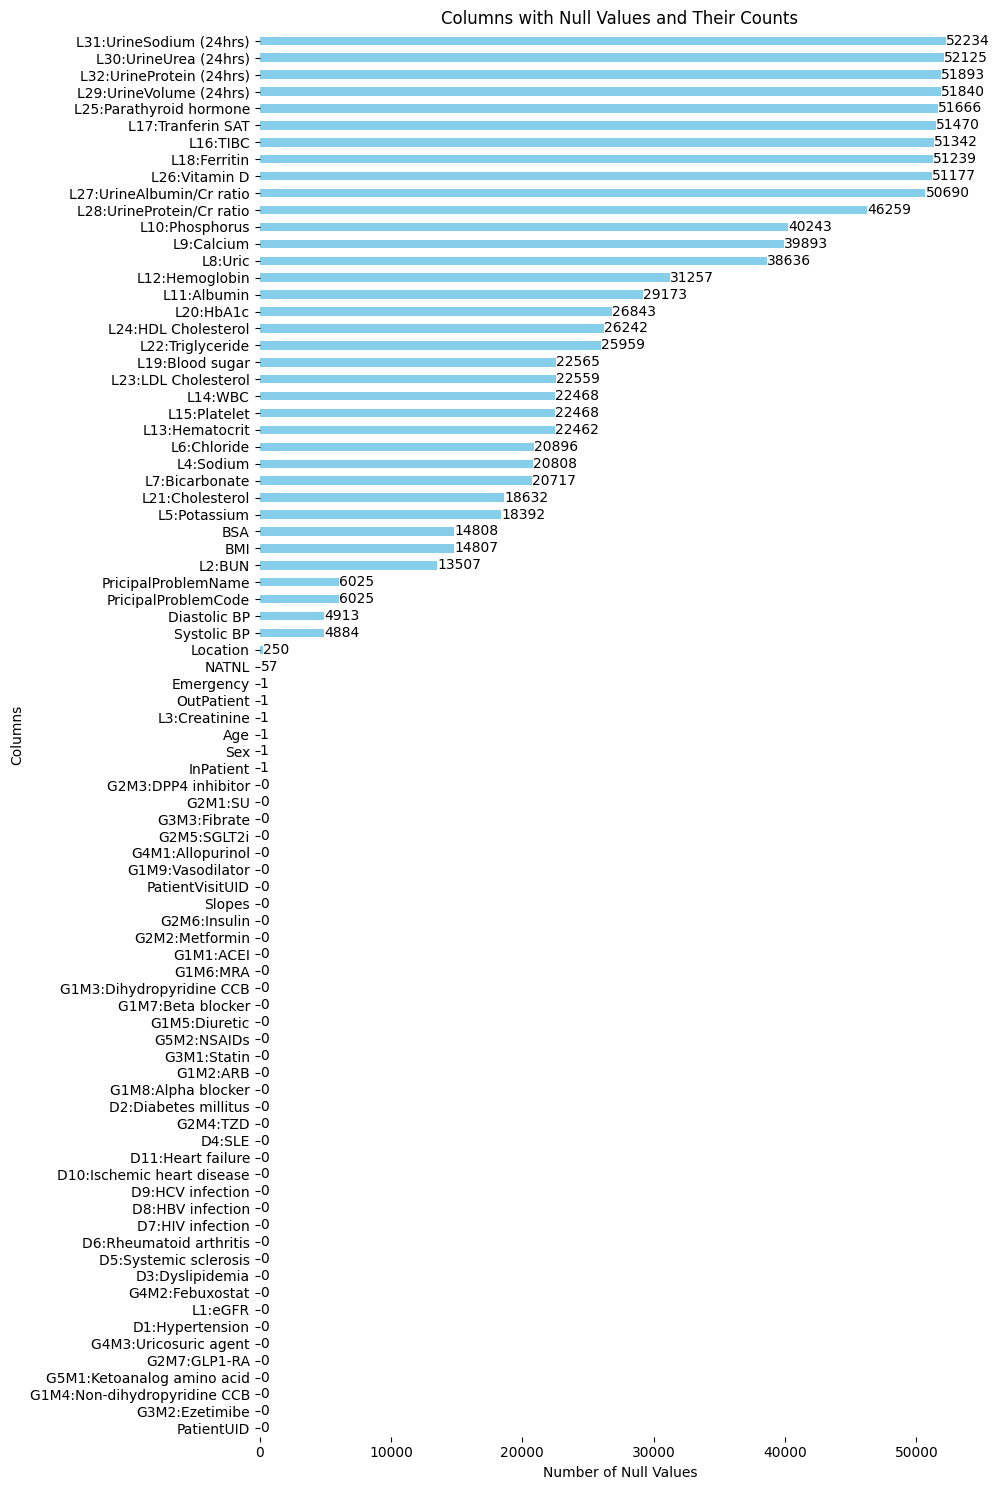

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame named merged_df

# Use the isnull() method to create a DataFrame of boolean values indicating null values
null_df = merged_df.isnull()

# Use the sum() method on the boolean DataFrame to count the number of null values in each column
null_count = null_df.sum()

# Filter columns with null values (exclude columns with no null values)
#null_count = null_count[null_count > 0]

# Sort the columns by the number of null values in ascending order
null_count_sorted = null_count.sort_values()

# Create a horizontal bar plot to visualize the distribution
plt.figure(figsize=(10, 15))  # Adjust the figsize to control the plot size
ax = null_count_sorted.plot(kind='barh', color='skyblue', edgecolor='none')  # Use 'barh' for horizontal bars

# Remove the frame or borders around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Columns with Null Values and Their Counts')
plt.xlabel('Number of Null Values')
plt.ylabel('Columns')
plt.tight_layout()

# Add labels with the number of null values next to each bar horizontally
label_distance = 10
for i, v in enumerate(null_count_sorted):
    ax.text(v + label_distance, i, str(v), color='black', va='center')

plt.show()


In [20]:
#merged_df.to_excel('WideTable.xlsx')